In [1]:
import pandas as pd

df = pd.read_json("https://data.nasa.gov/resource/y77d-th95.json")# reading the data

df = df.drop([':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4','fall'], axis=1)# removing columns which aren't asked

df['year']= pd.to_datetime(df['year'],errors = 'coerce')# changing data type to datetime format coerce for out of bound error

df['geolocation'] = df['geolocation'].apply(lambda x: x['coordinates'] if isinstance(x, dict) else x)
#in upper code we are removing all the unecessary keys, values and returning only value of coordinate as asked

df = df.rename(columns={'geolocation':'point coordinates'})# renaming the columns as asked

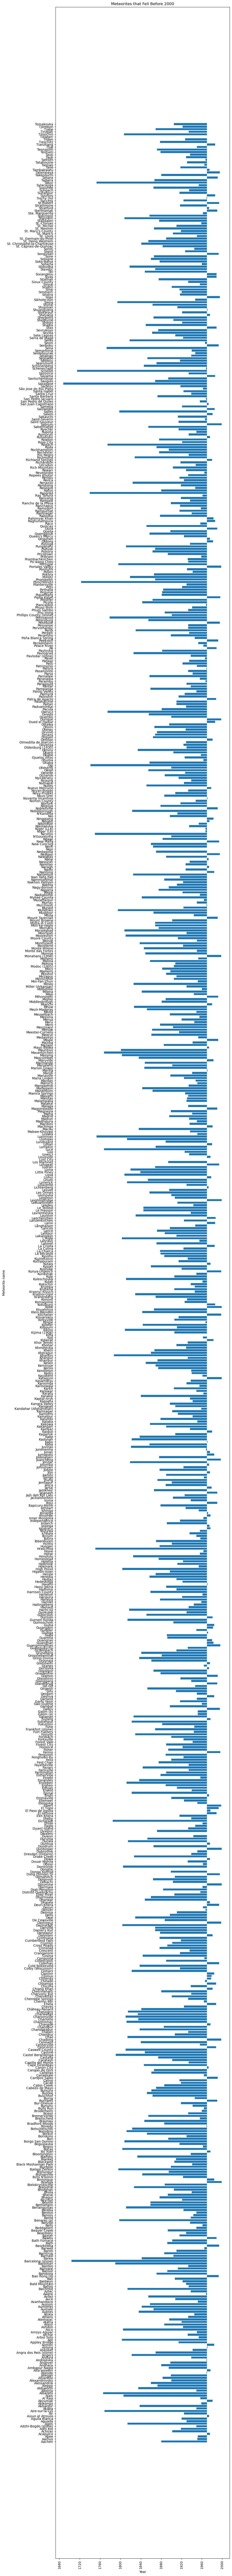

In [2]:
# Getting all the Earth meteorites that fell before the year 2000 
import matplotlib.pyplot as plt

# creating a temporary column which contains only year
df['new'] = pd.to_datetime(df['year']).dt.year


#filtering the years which are before 2000
Filter = df[df['new']<2000]

#plotting
plt.figure(figsize=(10, 110))
plt.barh(Filter['name'], Filter['year'])
plt.xlabel('Year')
plt.ylabel('Meteorite name')
plt.title('Meteorites that Fell Before 2000')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [3]:
# Getting all the earth meteorites co-ordinates who fell before the year 1970 

Filter = df[df['new']<1970]
data = Filter[['name', 'point coordinates']]


# This data has more than 700 entries so I don't think it's plotable.


#dropping the temporary column 'new'
df = df.drop(['new'], axis=1)
        
data    

,name,point coordinates
0,Aachen,"[6.08333, 50.775]"
1,Aarhus,"[10.23333, 56.18333]"
2,Abee,"[-113, 54.21667]"
4,Achiras,"[-64.95, -33.16667]"
5,Adhi Kot,"[71.8, 32.1]"
...,...,...
994,Timochin,"[35.2, 54.5]"
995,Tirupati,"[79.41667, 13.63333]"
997,Tjabe,"[111.53333, -7.08333]"
998,Tjerebon,"[106.58333, -6.66667]"


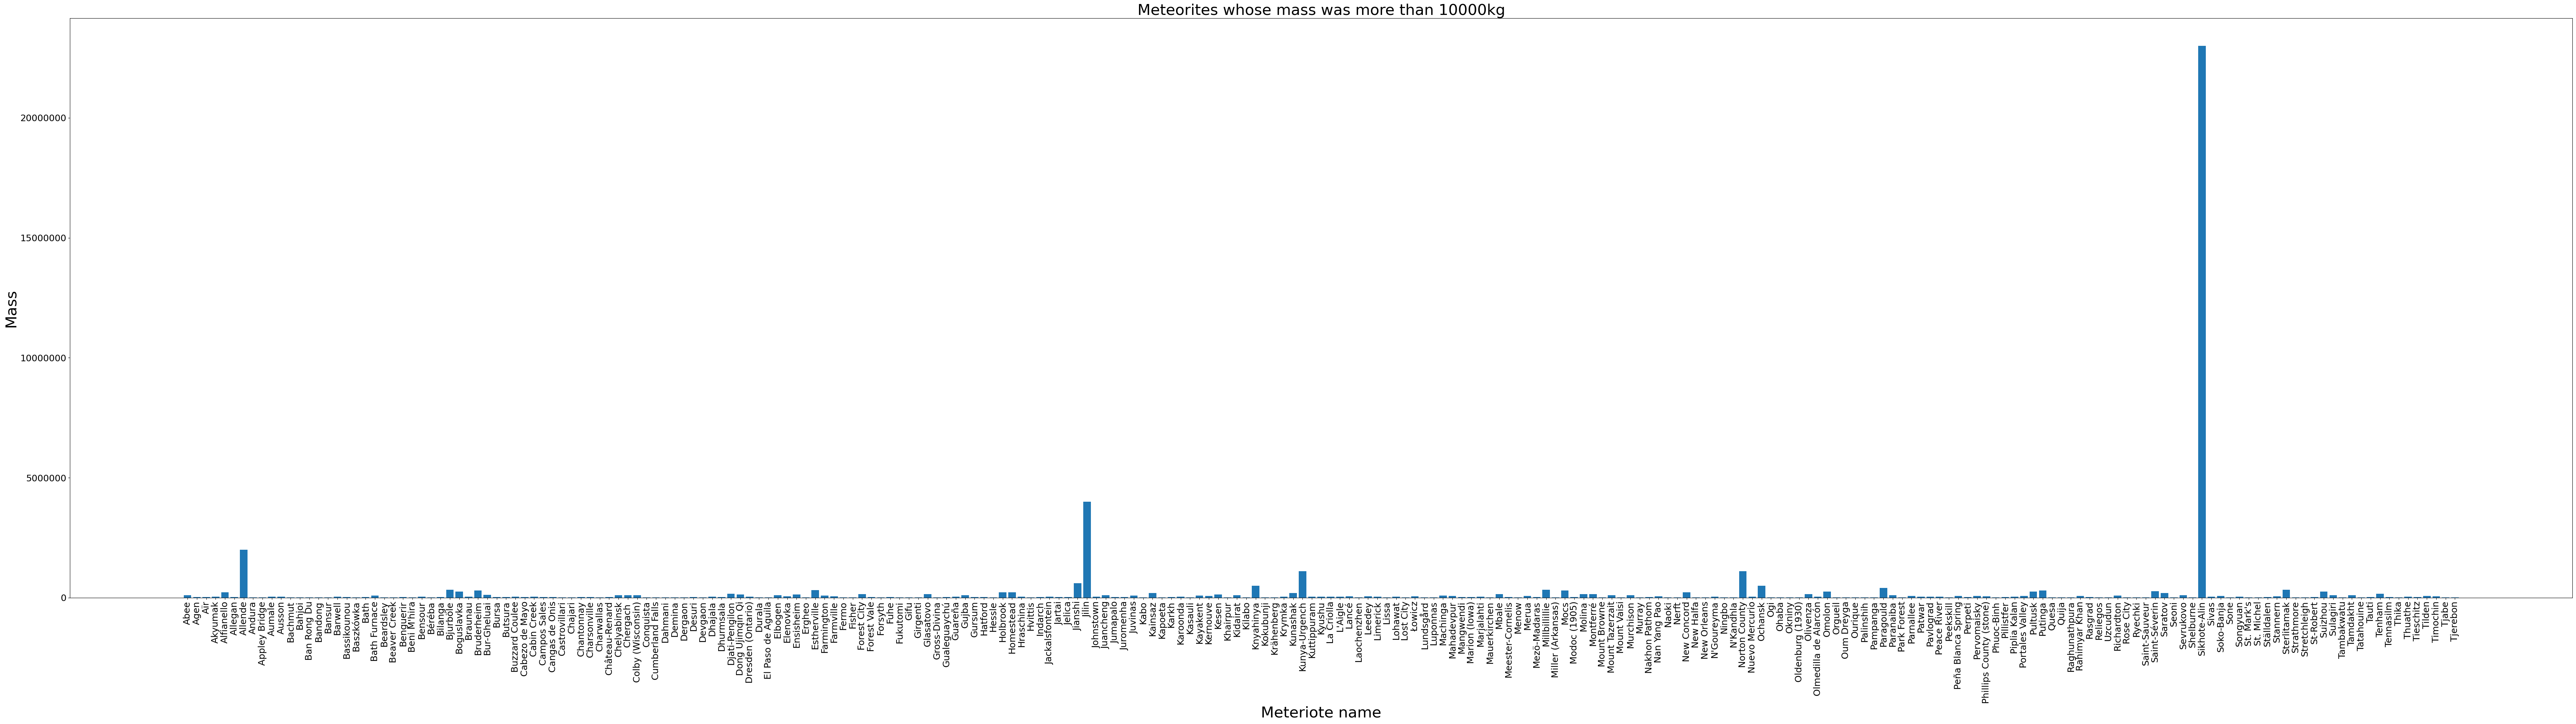

In [4]:
# Assuming that the mass of the earth meteorites was in kg, getting all those whose mass was more than 10000kg

#filtering out the values of mass more than 10,000kg
Filter = df[df['mass']>10000.0]


#plotting
plt.figure(figsize=(70, 20))
plt.bar(Filter['name'], Filter['mass'])
plt.xlabel('Meteriote name',fontsize=30)
plt.ylabel('Mass',fontsize=30)
plt.title('Meteorites whose mass was more than 10000kg',fontsize=30)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)#y values were getting edited between 0.0 to 2.0 so to stop that
plt.show()
